In [18]:
import rasterio
import matplotlib.pyplot as plt
import geopandas as gpd
from rasterio.plot import show
import numpy as np
import pandas as pd
from shapely import Point, wkt
from pyproj import Transformer
import os

In [2]:
population = rasterio.open(r"D:\Downloads\ind_pd_2020_1km.tif")
population_data = population.read(1)

In [16]:
gdf = gpd.read_file(r"grid_points_for_dam\Aad_Dam\Aad_Dam.shp")
dams = pd.read_csv(r"D:\CS\GitHub\Nuclear-Site-Selection\dam\dam.csv")

In [19]:
transformer = Transformer.from_crs(gdf.crs, "epsg:4326", always_xy=True)

In [28]:
dams['Avg_population']= 0

In [41]:
base_dir = r'D:\CS\GitHub\Nuclear-Site-Selection\gridpoints_csv_dams'

def read_population(dam_name):
    safe_dam_name = dam_name.replace(' ','_').replace('/','_').replace(':','').replace('\n','_').replace("?","")
    folder_path = os.path.join(base_dir,safe_dam_name)
    folder_path+='.csv'
    gridpoints = pd.read_csv(folder_path)
    gridpoints['population'] = 0
    for index, row in gridpoints.iterrows():
        point = wkt.loads(row['geometry'])  # Parse the geometry column
        longitude = point.x
        latitude = point.y
        original_longitude, original_latitude = point.x, point.y

        # Convert the coordinates to EPSG:4326
        longitude, latitude = transformer.transform(original_longitude, original_latitude)

        row_index, col_index = population.index(longitude, latitude)
        if population_data[row_index,col_index]>0:
            gridpoints.at[index,'population'] = population_data[row_index,col_index] 
        else:
            gridpoints.at[index,'population'] = 0

    avg_population = gridpoints['population'].mean()
    dams.loc[dams['dm_name'] == dam_name, 'Avg_population'] = avg_population
    gridpoints.to_csv(folder_path)
    


In [42]:
dams['dm_name'].apply(lambda dam_name:read_population(dam_name))

C:\Users\Nirman\AppData\Local\Temp\ipykernel_14052\437269003.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1291.55078125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gridpoints.at[index,'population'] = population_data[row_index,col_index]
C:\Users\Nirman\AppData\Local\Temp\ipykernel_14052\437269003.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '523.4667358398438' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gridpoints.at[index,'population'] = population_data[row_index,col_index]
C:\Users\Nirman\AppData\Local\Temp\ipykernel_14052\437269003.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '369.9420166015625' has dtype incompatible with int6

0       None
1       None
2       None
3       None
4       None
        ... 
5614    None
5615    None
5616    None
5617    None
5618    None
Name: dm_name, Length: 5619, dtype: object

In [45]:
dams.to_csv(r"D:\CS\GitHub\Nuclear-Site-Selection\dam\dam.csv")

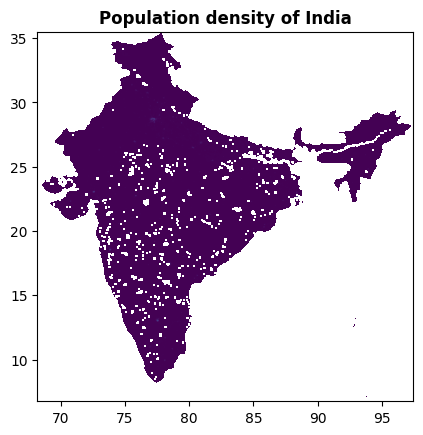

In [10]:
a = show(population,title = "Population density of India")

In [11]:
population.crs

CRS.from_epsg(4326)